In [2]:
!conda install -c pytorch pytorch-nightly-cpu -y 
!conda install -c fastai torchvision-nightly-cpu -y 
!conda install -c fastai fastai -y 
!pip install tensorflow
!pip install fastai
!conda install nb_conda -y
!pip install dataclasses
!pip install fastai==0.7.0
!pip install keras
!pip install --upgrade pip
!conda remove seaborn -y
!pip uninstall seaborn 
!pip3 --no-cache-dir install seaborn 

/bin/bash: conda: command not found
/bin/bash: conda: command not found
/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 8.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of fastai to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement torch<0.4 (from fastai) (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch<0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking 

In [3]:
!pip install pandas-summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas_summary-0.2.0-py2.py3-none-any.whl (5.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 3.7 MB/s eta 0:00:00


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
import datetime
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
import seaborn as sns
sns.set()
%load_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *
from fastai.tabular import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [5]:
coinbase=pd.read_csv('BTC-2021min.csv')


## Data Exploration

In [6]:
coinbase.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
1,1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2,1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
3,1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
4,1646105880,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [7]:
coinbase = coinbase.drop(['unix'], axis=1)

In [8]:
coinbase.tail()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
408434,2021-05-21 12:28:00,BTC/USD,40970.08,41031.00,40870.89,40982.53,13.423289,550120.347010
408435,2021-05-21 12:27:00,BTC/USD,41069.59,41077.79,40961.41,40961.41,1.438565,58925.669209
408436,2021-05-21 12:26:00,BTC/USD,41077.52,41082.01,41054.78,41061.01,4.594053,188636.461922
408437,2021-05-21 12:25:00,BTC/USD,40999.96,41097.11,40999.96,41091.57,1.710100,70270.706595
408438,2021-05-21 12:24:00,BTC/USD,41065.63,41082.42,40979.18,40979.18,2.922000,NaN


In [9]:
coinbase.describe()

,open,high,low,close,Volume BTC,Volume USD
count,408439.000000,408439.000000,408439.000000,408439.000000,408439.000000,4.084380e+05
mean,45403.587553,45425.751748,45380.598688,45403.784997,1.945132,8.525998e+04
std,9185.935565,9187.053717,9184.569739,9185.955038,4.898306,2.157164e+05
min,28900.300000,28920.000000,28600.000000,28839.680000,0.000000,0.000000e+00
25%,37915.190000,37939.020000,37892.125000,37914.540000,0.099813,4.550760e+03
50%,44171.000000,44190.200000,44151.240000,44170.980000,0.504800,2.215812e+04
75%,49889.585000,49907.490000,49869.480000,49888.855000,1.845984,7.999506e+04
max,69000.000000,69000.000000,68799.990000,69000.000000,359.703236,1.291715e+07


In [10]:
coinbase.isna().sum()/coinbase.count()

date          0.000000
symbol        0.000000
open          0.000000
high          0.000000
low           0.000000
close         0.000000
Volume BTC    0.000000
Volume USD    0.000002
dtype: float64

In [11]:
coinbase['Date'] = coinbase['date']

In [12]:
coinbase.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD,Date
0,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,2022-03-01 03:43:00
1,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022-03-01 03:41:00
2,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022-03-01 03:40:00
3,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,2022-03-01 03:39:00
4,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022-03-01 03:38:00


Let's get rid of the timestamp Now

In [13]:
coinbase.drop(['date','symbol'], axis=1)

,open,high,low,close,Volume BTC,Volume USD,Date
0,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,2022-03-01 03:43:00
1,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022-03-01 03:41:00
2,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022-03-01 03:40:00
3,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,2022-03-01 03:39:00
4,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022-03-01 03:38:00
...,...,...,...,...,...,...,...
408434,40970.08,41031.00,40870.89,40982.53,13.423289,550120.347010,2021-05-21 12:28:00
408435,41069.59,41077.79,40961.41,40961.41,1.438565,58925.669209,2021-05-21 12:27:00
408436,41077.52,41082.01,41054.78,41061.01,4.594053,188636.461922,2021-05-21 12:26:00
408437,40999.96,41097.11,40999.96,41091.57,1.710100,70270.706595,2021-05-21 12:25:00


In [14]:
coinbase.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD,Date
0,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,2022-03-01 03:43:00
1,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022-03-01 03:41:00
2,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022-03-01 03:40:00
3,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,2022-03-01 03:39:00
4,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022-03-01 03:38:00


In [15]:
coinbase.isna().sum()/coinbase.count()

date          0.000000
symbol        0.000000
open          0.000000
high          0.000000
low           0.000000
close         0.000000
Volume BTC    0.000000
Volume USD    0.000002
Date          0.000000
dtype: float64

In [16]:
timeindex=pd.DatetimeIndex(coinbase['Date'])

In [17]:
coinbase.set_index(timeindex,inplace=True)

In [18]:
coinbase['2022-03-01'].head()

<ipython-input-18-7ec19987b924>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  coinbase['2022-03-01'].head()


,date,symbol,open,high,low,close,Volume BTC,Volume USD,Date
Date,,,,,,,,,
2022-03-01 03:43:00,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,2022-03-01 03:43:00
2022-03-01 03:41:00,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,2022-03-01 03:41:00
2022-03-01 03:40:00,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,2022-03-01 03:40:00
2022-03-01 03:39:00,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,2022-03-01 03:39:00
2022-03-01 03:38:00,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,2022-03-01 03:38:00


<ipython-input-19-37ef6d9da568>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data=coinbase['2022-03-01']


Date
2022-03-31    Axes(0.125,0.2;0.775x0.68)
Freq: BM, Name: high, dtype: object

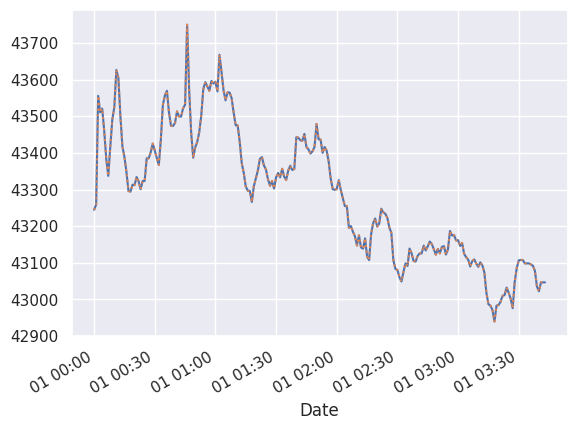

In [19]:
data=coinbase['2022-03-01']
data['high'].plot(style="-")
data['high'].resample('BM').plot(style=":")

In [20]:
def preprocess(dataframe):
    data=data.fillna(method='ffill')
    data=add_datepart(data, 'Date')
    return data

In [21]:
coinbase=coinbase.fillna(method='ffill')

In [22]:
coinbase.corr()

<ipython-input-22-6f0edc0a89c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coinbase.corr()


,open,high,low,close,Volume BTC,Volume USD
open,1.000000,0.999992,0.999992,0.999988,-0.067926,0.017584
high,0.999992,1.000000,0.999985,0.999993,-0.066413,0.019111
low,0.999992,0.999985,1.000000,0.999993,-0.069570,0.015886
close,0.999988,0.999993,0.999993,1.000000,-0.067924,0.017585
Volume BTC,-0.067926,-0.066413,-0.069570,-0.067924,1.000000,0.974407
Volume USD,0.017584,0.019111,0.015886,0.017585,0.974407,1.000000


In [23]:
coinbase['PriceClose2D']=coinbase['close']

In [24]:
shift=24 # 24 hours = 2days 
coinbase['PriceClose2D']=coinbase['PriceClose2D'].shift(-shift)
coinbase=coinbase[:-shift]

In [25]:
coinbase[73:90]

,date,symbol,open,high,low,close,Volume BTC,Volume USD,Date,PriceClose2D
Date,,,,,,,,,,
2022-03-01 02:29:00,2022-03-01 02:29:00,BTC/USD,43051.60,43083.50,43051.60,43083.50,0.144470,6224.273245,2022-03-01 02:29:00,43190.03
2022-03-01 02:28:00,2022-03-01 02:28:00,BTC/USD,43107.01,43107.01,43065.10,43065.39,0.312454,13455.953367,2022-03-01 02:28:00,43229.85
2022-03-01 02:27:00,2022-03-01 02:27:00,BTC/USD,43181.85,43181.85,43103.32,43103.32,0.407824,17578.558462,2022-03-01 02:27:00,43234.81
2022-03-01 02:26:00,2022-03-01 02:26:00,BTC/USD,43196.62,43196.62,43169.67,43194.13,1.736092,74988.978357,2022-03-01 02:26:00,43263.05
2022-03-01 02:25:00,2022-03-01 02:25:00,BTC/USD,43220.94,43223.14,43220.94,43223.14,0.013000,561.900820,2022-03-01 02:25:00,43287.82
2022-03-01 02:24:00,2022-03-01 02:24:00,BTC/USD,43234.03,43234.03,43234.03,43234.03,0.000000,0.000000,2022-03-01 02:24:00,43296.76
2022-03-01 02:23:00,2022-03-01 02:23:00,BTC/USD,43233.70,43237.74,43218.24,43234.03,1.380387,59679.692105,2022-03-01 02:23:00,43296.36
2022-03-01 02:22:00,2022-03-01 02:22:00,BTC/USD,43201.93,43247.75,43201.93,43233.70,0.135618,5863.250633,2022-03-01 02:22:00,43258.75
2022-03-01 02:21:00,2022-03-01 02:21:00,BTC/USD,43180.67,43206.92,43166.99,43174.67,0.262012,11312.272138,2022-03-01 02:21:00,43273.95


In [26]:
from fastai.tabular.core import add_datepart 

add_datepart(coinbase,'Date')

,date,symbol,open,high,low,close,Volume BTC,Volume USD,PriceClose2D,Year,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-01 03:43:00,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,42939.95,2022,...,1,1,60,False,True,False,False,False,False,1.646106e+09
2022-03-01 03:41:00,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,42920.46,2022,...,1,1,60,False,True,False,False,False,False,1.646106e+09
2022-03-01 03:40:00,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,42981.47,2022,...,1,1,60,False,True,False,False,False,False,1.646106e+09
2022-03-01 03:39:00,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,42986.98,2022,...,1,1,60,False,True,False,False,False,False,1.646106e+09
2022-03-01 03:38:00,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,42973.47,2022,...,1,1,60,False,True,False,False,False,False,1.646106e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-21 12:52:00,2021-05-21 12:52:00,BTC/USD,40724.63,40781.73,40689.47,40704.56,3.797062,154557.755099,40982.53,2021,...,21,4,141,False,False,False,False,False,False,1.621602e+09
2021-05-21 12:51:00,2021-05-21 12:51:00,BTC/USD,40678.86,40775.26,40652.26,40686.19,4.235018,172306.742526,40961.41,2021,...,21,4,141,False,False,False,False,False,False,1.621601e+09
2021-05-21 12:50:00,2021-05-21 12:50:00,BTC/USD,40804.55,40810.86,40659.99,40668.35,3.877613,157696.109635,41061.01,2021,...,21,4,141,False,False,False,False,False,False,1.621601e+09


In [27]:
coinbase['2022']

<ipython-input-27-6ccd84d1b61d>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  coinbase['2022']


,date,symbol,open,high,low,close,Volume BTC,Volume USD,PriceClose2D,Year,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-01 03:43:00,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000,42939.95,2022,...,1,1,60,False,True,False,False,False,False,1.646106e+09
2022-03-01 03:41:00,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021,42920.46,2022,...,1,1,60,False,True,False,False,False,False,1.646106e+09
2022-03-01 03:40:00,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957,42981.47,2022,...,1,1,60,False,True,False,False,False,False,1.646106e+09
2022-03-01 03:39:00,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268,42986.98,2022,...,1,1,60,False,True,False,False,False,False,1.646106e+09
2022-03-01 03:38:00,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143,42973.47,2022,...,1,1,60,False,True,False,False,False,False,1.646106e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01 00:04:00,2022-01-01 00:04:00,BTC/USD,46326.81,46326.81,46289.56,46289.56,4.159950,192562.242161,46420.87,2022,...,1,5,1,False,True,False,True,False,True,1.640995e+09
2022-01-01 00:03:00,2022-01-01 00:03:00,BTC/USD,46359.84,46386.33,46319.86,46342.63,0.098252,4553.263034,46412.44,2022,...,1,5,1,False,True,False,True,False,True,1.640995e+09
2022-01-01 00:02:00,2022-01-01 00:02:00,BTC/USD,46310.02,46370.36,46276.28,46370.36,0.545551,25297.389313,46414.07,2022,...,1,5,1,False,True,False,True,False,True,1.640995e+09


In [28]:
coinbase.corr()

<ipython-input-28-6f0edc0a89c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coinbase.corr()


,open,high,low,close,Volume BTC,Volume USD,PriceClose2D,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
open,1.000000,0.999992,0.999992,0.999988,-0.067902,0.017611,0.999715,-0.251325,0.604968,0.610276,-0.061515,-0.016159,0.601011,-0.016558,0.002155,-0.040223,-0.034855,0.012241,0.011152,0.335617
high,0.999992,1.000000,0.999985,0.999993,-0.066388,0.019138,0.999711,-0.251539,0.605054,0.610347,-0.061401,-0.016386,0.601105,-0.016551,0.002150,-0.040239,-0.034876,0.012215,0.011095,0.335353
low,0.999992,0.999985,1.000000,0.999993,-0.069545,0.015913,0.999699,-0.251116,0.604866,0.610192,-0.061605,-0.015922,0.600903,-0.016538,0.002162,-0.040197,-0.034818,0.012267,0.011218,0.335853
close,0.999988,0.999993,0.999993,1.000000,-0.067899,0.017612,0.999702,-0.251319,0.604958,0.610266,-0.061512,-0.016158,0.601001,-0.016540,0.002161,-0.040215,-0.034845,0.012244,0.011155,0.335614
Volume BTC,-0.067902,-0.066388,-0.069545,-0.067899,1.000000,0.974405,-0.066585,-0.043535,-0.017132,-0.022645,0.012578,-0.069190,-0.016553,-0.004879,-0.006299,-0.002969,-0.005348,-0.008450,-0.017365,-0.100493
Volume USD,0.017611,0.019138,0.015913,0.017612,0.974405,1.000000,0.018849,-0.057236,0.032223,0.026679,0.002969,-0.070879,0.032148,-0.004972,-0.005064,-0.005788,-0.007521,-0.007241,-0.016824,-0.061226
PriceClose2D,0.999715,0.999711,0.999699,0.999702,-0.066585,0.018849,1.000000,-0.251259,0.604930,0.610220,-0.061500,-0.016221,0.600975,-0.016795,0.002061,-0.040261,-0.035092,0.012322,0.011021,0.335688
Year,-0.251325,-0.251539,-0.251116,-0.251319,-0.043535,-0.057236,-0.251259,1.000000,-0.842610,-0.798520,-0.047070,0.005362,-0.841692,-0.004032,0.012051,-0.053079,0.031751,-0.030536,0.115872,0.703708
Month,0.604968,0.605054,0.604866,0.604958,-0.017132,0.032223,0.604930,-0.842610,1.000000,0.959623,-0.008491,-0.009585,0.996647,-0.010111,-0.001400,0.050044,-0.037607,0.079216,-0.105679,-0.214752
Week,0.610276,0.610347,0.610192,0.610266,-0.022645,0.026679,0.610220,-0.798520,0.959623,1.000000,0.034068,0.001726,0.959920,0.012201,0.037164,0.061491,0.061491,0.086059,0.086059,-0.183219


<ipython-input-29-5aa34c20a409>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  arima2022day=coinbase['2022':].resample('D').mean().fillna(method='ffill')['close']


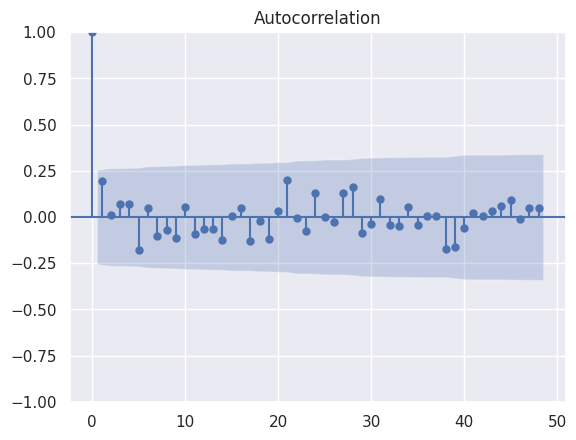

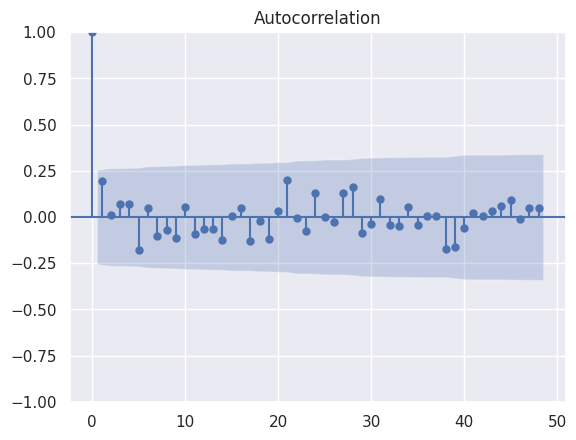

In [29]:
arima2022day=coinbase['2022':].resample('D').mean().fillna(method='ffill')['close']
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(arima2022day.diff().dropna(), lags= 48, alpha=0.05)

## Model: Recurrent Neural Networks with LSTM

In [30]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from pandas import Series

data=pd.read_csv('BTC-2021min.csv')


data=data.set_index(pd.DatetimeIndex(data['date']))['close']
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

look_back=3

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #takes 
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(0)

# load the dataset
dataframe = data
dataset = dataframe.values
dataset = dataset.astype('float64').reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler()
#scaler=RobustScaler()
#scaler=StandardScaler()
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
#look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
from keras.layers import Activation, Dense,Dropout
model = Sequential()

model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(256))

model.add(Dense(1))
import keras
from keras import optimizers


model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, verbose=1,shuffle=False,batch_size=128)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
predictions = numpy.empty_like(dataset)
predictions[:, :] = numpy.nan
predictions[look_back:len(trainPredict)+look_back, :] = trainPredict
predictions[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

predictionsDF=pd.DataFrame(predictions,columns=["predicted"],index=dataframe.index)
ans=pd.concat([dataframe,predictionsDF],axis=1)
print( ans,[look_back,trainScore,testScore])


Epoch 1/5
2297/2297 [==============================] - 93s 37ms/step - loss: 4.2556e-04
Epoch 2/5
2297/2297 [==============================] - 67s 29ms/step - loss: 2.7916e-04
Epoch 3/5
2297/2297 [==============================] - 68s 30ms/step - loss: 5.9852e-04
Epoch 4/5
2297/2297 [==============================] - 68s 29ms/step - loss: 7.6708e-04
Epoch 5/5
4526/4526 [==============================] - 20s 4ms/step
Train Score: 8285.76 RMSE
Test Score: 9254.77 RMSE
                        close     predicted
date                                       
2022-03-01 03:43:00  43046.58           NaN
2022-03-01 03:41:00  43046.58           NaN
2022-03-01 03:40:00  43016.03           NaN
2022-03-01 03:39:00  42999.44  45353.550781
2022-03-01 03:38:00  43049.46  45352.437500
...                       ...           ...
2021-04-30 10:11:00  54463.57  46032.078125
2021-04-30 10:10:00  54485.87  46031.703125
2021-04-30 10:09:00  54500.00  46031.777344
2021-04-30 10:08:00  54511.61  46032.167969
2

Let's plot and compare the prices predicted and actual price.

<Axes: xlabel='date'>

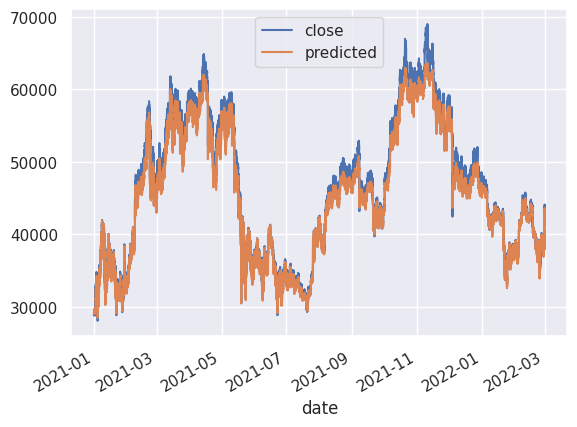

In [ ]:
ans.plot()

<ipython-input-33-4ff72bc27ca3>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ans['2021-01'].plot()


<Axes: xlabel='date'>

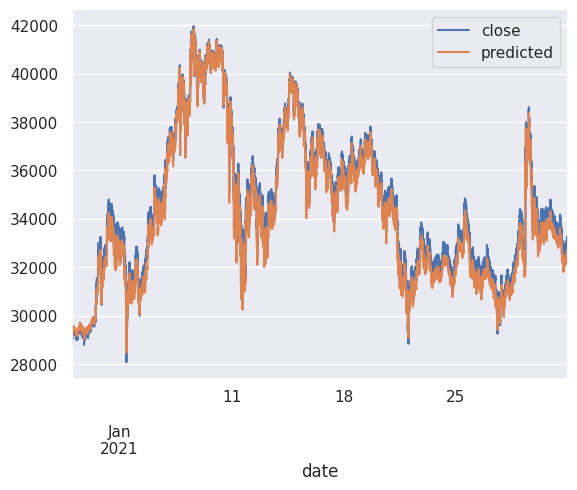

In [ ]:
ans['2021-01'].plot()

The above graph is bitcoin prediction during the great bitcoin fall in 2017 December. As you can see its pretty close. 

<ipython-input-38-682ca85d9e29>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ans['2021-01-03'].plot()


<Axes: xlabel='date'>

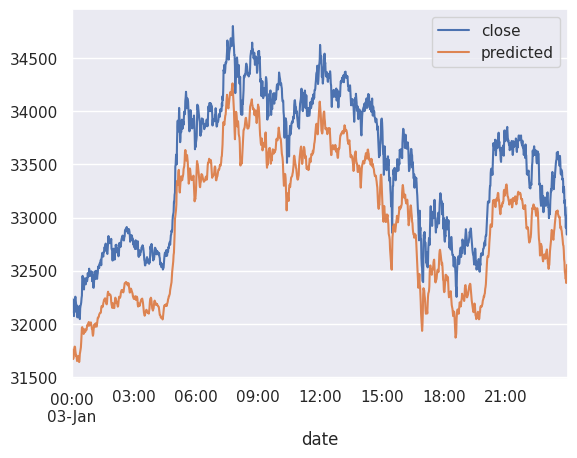

In [ ]:
ans['2021-01-03'].plot() 

In [32]:
filename = 'lstm.pkl'
pickle.dump(model, open(filename, 'wb'))

In [33]:
loaded_model = pickle.load(open(filename, 'rb'))

In [55]:
pred = loaded_model.predict(testX)

4526/4526 [==============================] - 25s 5ms/step


In [56]:
pred

array([[0.41314852],
       [0.41314548],
       [0.4131261 ],
       ...,
       [0.42808485],
       [0.42808658],
       [0.42809635]], dtype=float32)